# DTW 
- https://k-dm.work/ja/timeseries/shape/001_dtw/

In [3]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from matplotlib import pyplot as plt
import pandas as pd

## Sample 1

DTW距離: 2.0


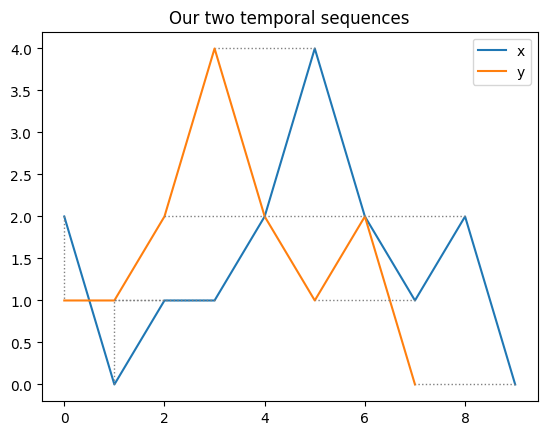

In [12]:
# 異なる2種類のデータを定義
x = np.array([2, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
y = np.array([1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)

# DTWを計算
distance, path = fastdtw(x, y, dist=euclidean)
print("DTW距離:", distance)
plt.plot(x, label='x')
plt.plot(y, label='y')

# 各点がどのように対応しているかを図示する
for x_, y_ in path:
  plt.plot([x_, y_], [x[x_], y[y_]], color='gray', linestyle='dotted', linewidth=1)
plt.legend()
plt.title('Our two temporal sequences')
plt.show()

## Sample 2

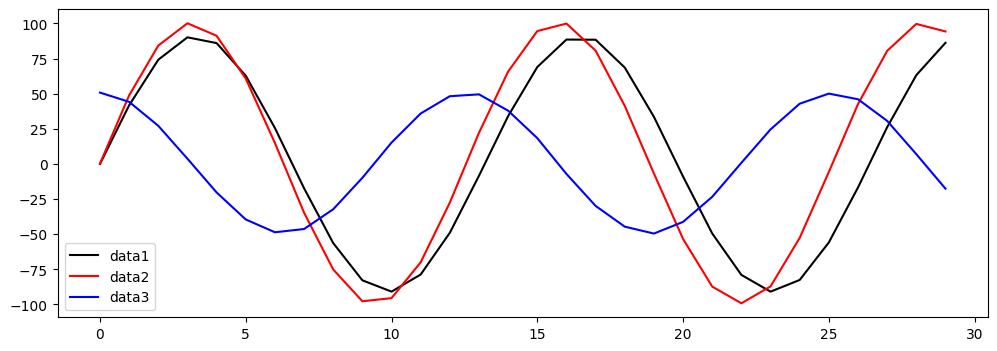

In [177]:
data1 = [91.0 * np.sin(i / 2.1) for i in range(30)]
data2 = [100.0 * np.sin(i / 2.0) + np.random.rand() for i in range(30)]
data3 = [50.0 * np.cos(i / 2.0) + np.random.rand() for i in range(30)]

plt.figure(figsize=(12, 4))

# 波形をプロット
plt.plot(data1, label="data1", color="k")
plt.plot(data2, label="data2", color="r")
plt.plot(data3, label="data3", color="b")
plt.legend()
plt.show()

In [178]:
# DTWを計算
distance_12, path_12 = fastdtw(data1, data2)
distance_13, path_13 = fastdtw(data1, data3)
distance_23, path_23 = fastdtw(data2, data3)
print(f'DTW : {distance_12}')
print(f'DTW : {distance_13}')
print(f'DTW : {distance_23}')

DTW : 298.7195379781256
DTW : 899.3067464432778
DTW : 1067.4896756640076


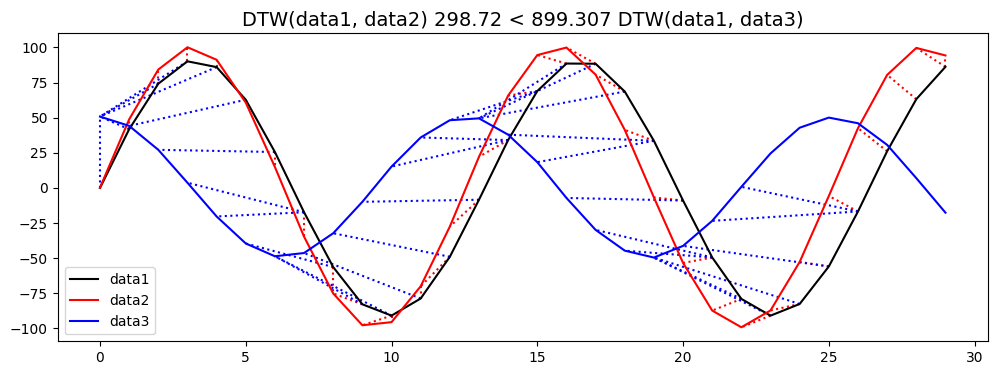

In [180]:
# 対応するポイントを線で結ぶ
plt.figure(figsize=(12, 4))
count = 0
for x_12, x_13 in zip(path_12, path_13):
    plt.plot(x_12, [data1[x_12[0]], data2[x_12[1]]], color="r", linestyle="dotted")
    # print(x_12, [data1[x_12[0]], data2[x_12[1]]])
    # count += 1
    # if count == 10: break
    plt.plot(x_13, [data1[x_13[0]], data3[x_13[1]]], color="b", linestyle="dotted")

# 波形をプロット
plt.plot(data1, label="data1", color="k")
plt.plot(data2, label="data2", color="r")
plt.plot(data3, label="data3", color="b")
plt.legend()
plt.title(
    f"DTW(data1, data2) {np.round(distance_12, 3)} < {np.round(distance_13, 3)} DTW(data1, data3)",
    fontsize=14,
)
plt.show()

In [202]:
df = pd.read_csv('data01.csv')


In [207]:
num1, direction = 1, "X"


def dtwFunc(num1, direction):
    cae = df[[f"hz{num1}", f"{direction}{num1}"]][df[f"hz{num1}"] % 1 == 0]
    exp = df[[f"hz{num1+1}", f"{direction}{num1+1}"]][df[f"hz{num1+1}"] % 1 == 0]

    hzCae = cae[f"hz{num1}"]
    hzExp = exp[f"hz{num1+1}"]

    dataCae = cae[f"{direction}{num1}"]
    dataExp = exp[f"{direction}{num1+1}"]

    distance_12, path_12 = fastdtw(dataCae, dataExp)
    print(f"DTW : {distance_12}")

    # 対応するポイントを線で結ぶ
    plt.figure(figsize=(10, 3))
    for x_12 in path_12:
        plt.plot(
            [list(hzCae)[x_12[0]], list(hzExp)[x_12[1]]],
            [list(dataCae)[x_12[0]], list(dataExp)[x_12[1]]],
            color="b",
            linestyle="dotted",
        )

    # 波形をプロット
    plt.plot(cae[f"hz{num1}"], cae[f"{direction}{num1}"], label="dataCae", color="k")
    plt.plot(
        exp[f"hz{num1+1}"], exp[f"{direction}{num1+1}"], label="dataExp", color="r"
    )
    plt.legend()
    plt.title(
        f"DTW(cae, exp) {direction}{num1}{num1+1} : {np.round(distance_12, 3)}",
        fontsize=14,
    )
    plt.show()

DTW : 9.744536456000008


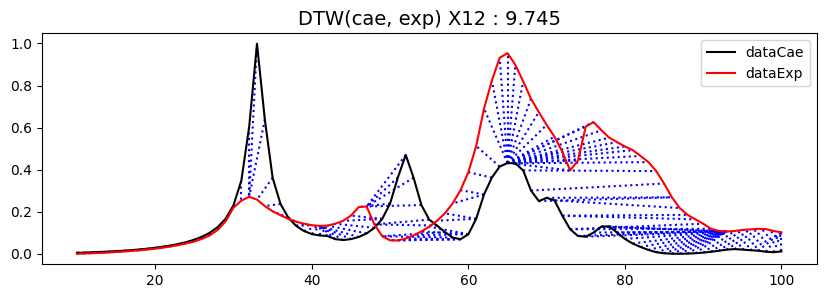

In [208]:
dtwFunc(1, 'X')

DTW : 14.052846724000002


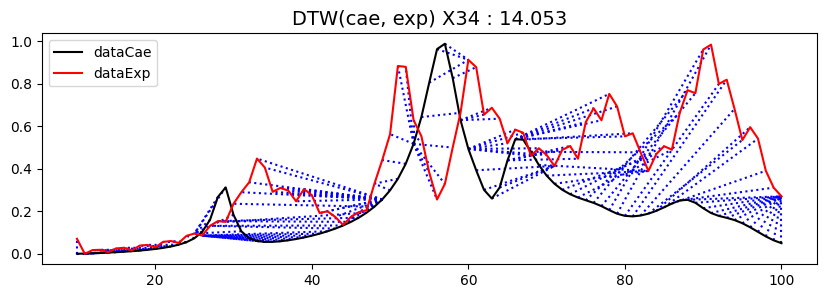

In [168]:
dtwFunc(3, 'X')

DTW : 17.185761756999998


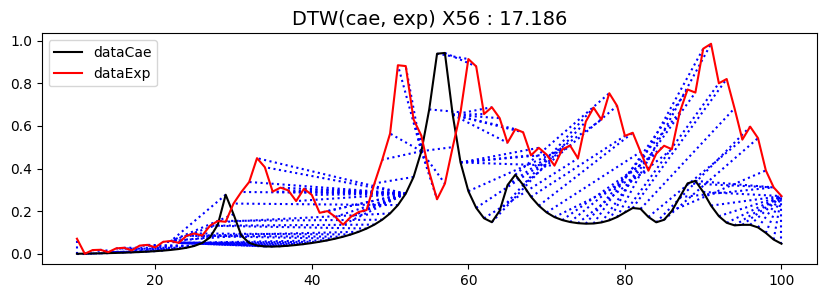

In [169]:
dtwFunc(5, 'X')
    
# plt.show()

DTW : 4.904311647999998


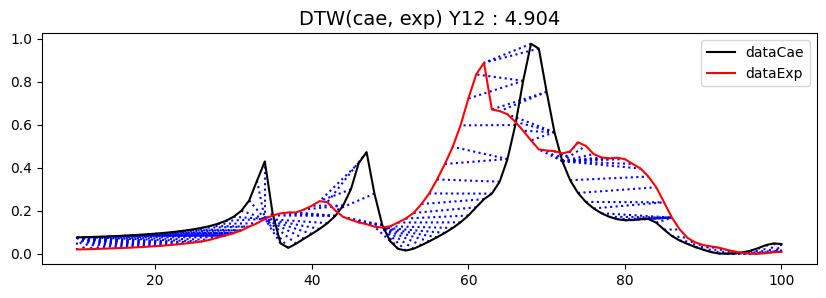

In [170]:
dtwFunc(1, 'Y')

DTW : 17.008138998000003


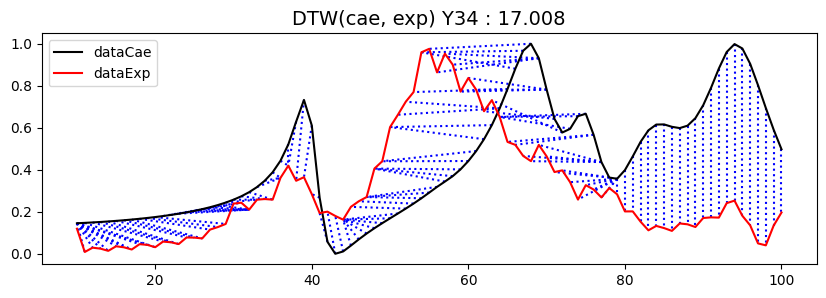

In [171]:
dtwFunc(3, 'Y')

DTW : 11.018757839999997


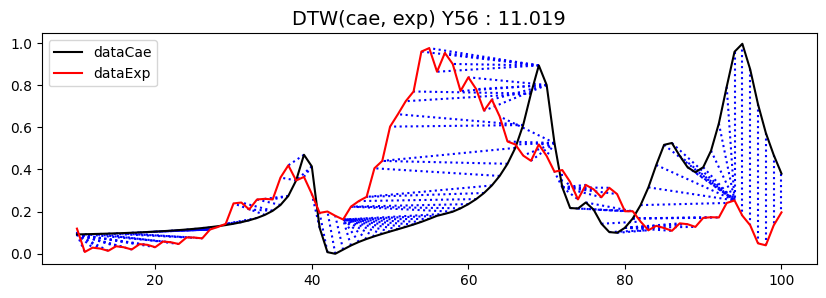

In [172]:
dtwFunc(5, 'Y')

DTW : 4.363494671000001


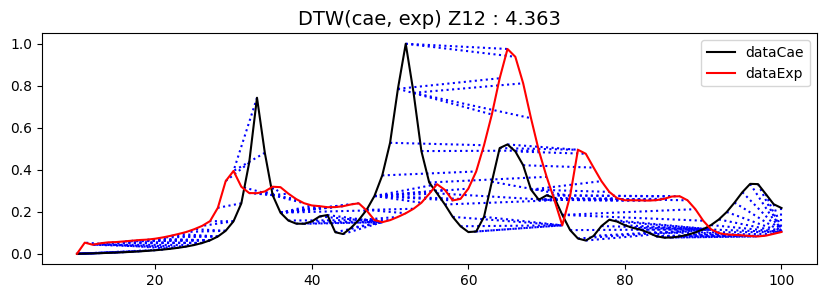

In [173]:
dtwFunc(1, 'Z')

DTW : 10.773764344000002


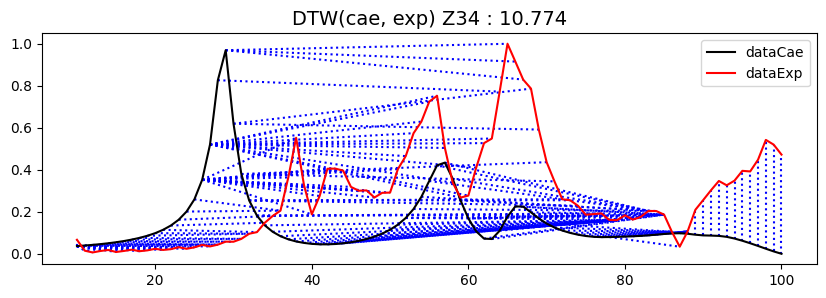

In [174]:
dtwFunc(3, 'Z')

DTW : 11.179264738999997


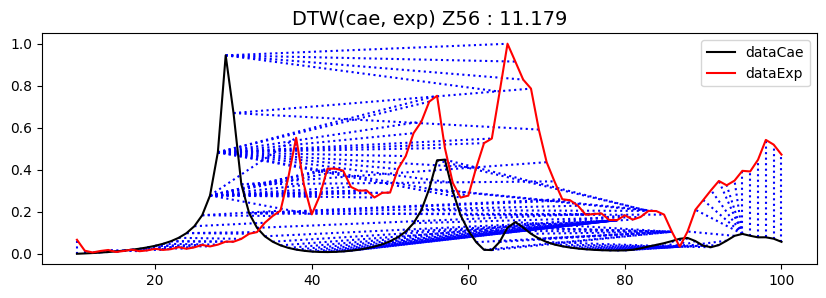

In [175]:
dtwFunc(5, 'Z')